<h2 align="center"> Logistic Regression for PPM
</h2>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [21]:
data = pd.read_csv("air.csv")
data.head()

,ppm,intensity,win_pos
0,250,300,1
1,265,789,0
2,123,123,1
3,423,145,0
4,145,658,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
ppm          50 non-null int64
intensity    50 non-null int64
win_pos      50 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB


In [23]:
scores = data[['ppm', 'intensity']].values
results = data['win_pos'].values

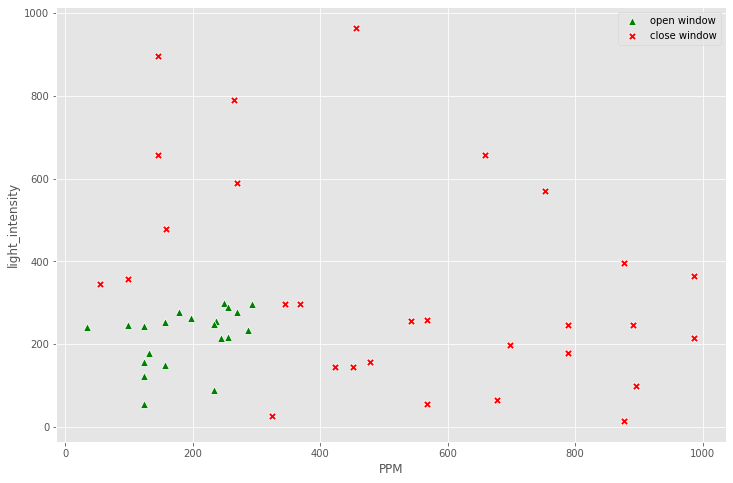

In [24]:
passed = (results == 1).reshape(50, 1)
failed = (results == 0).reshape(50, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="PPM", ylabel="light_intensity")
ax.legend(["open window", "close window"])
plt.show();

In [25]:
def logistic_function(x):    
    return 1/ (1 + np.exp(-x))

In [26]:
logistic_function(0)

0.5

In [27]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

In [28]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.6931471805599446
Gradient at initialization: [[0.08      ]
 [0.30330796]
 [0.14557981]]


In [29]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [30]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [31]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-1.66655112]
 [-3.71435477]
 [-2.0466673 ]]
Resulting cost: 0.2891479286837359


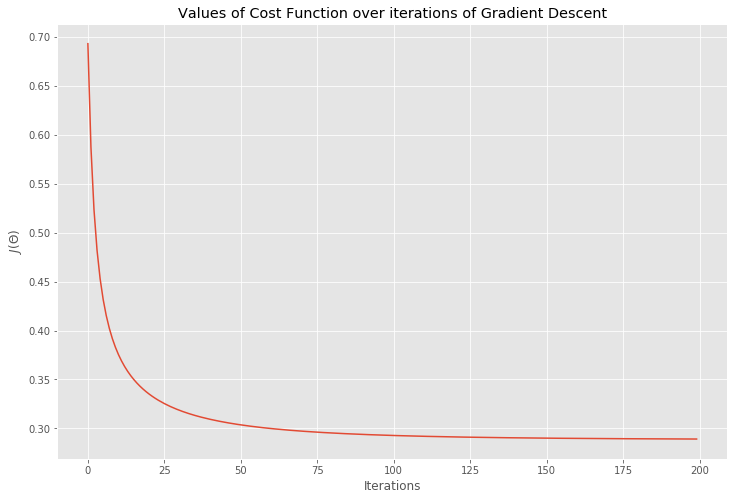

In [32]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

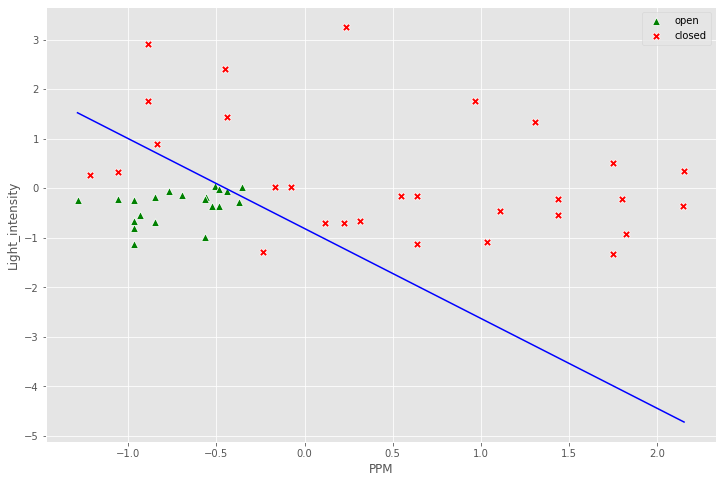

In [15]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["open", "closed"])
ax.set(xlabel="PPM", ylabel="Light_intensity")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

In [16]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [17]:
p = predict(theta, X)

In [18]:
test = np.array([0,320])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("If the ppm and light intensity are between50,1000",
      np.round(probability[0], 2),"probability of Opening window.")

If the ppm and light intensity are between50,1000 0.96 probability of Opening window.
